# Community Overlap

In [1]:
import networkx as nx

G = nx.read_graphml('graphs/reddit/merged_all_events_louvain.graphml')

from collections import defaultdict

comms = defaultdict(set)

for i, attr in G.nodes(data=True):

    comm = attr["community"]
    comms[comm].add(i)

comms_edges = {comm: {"Tokyo Olympics":0, "Paris Olympics":0, "Russia World Cup":0, "Qatar World Cup":0} for comm in comms}

node_to_comm = {}
for comm, nodes in comms.items():
    for node in nodes:
        node_to_comm[node] = comm

for u, v, d in G.edges(data=True):
    year = d.get("year")
    comms_in_edge = set()

    if u in node_to_comm:
        comms_in_edge.add(node_to_comm[u])
    if v in node_to_comm:
        comms_in_edge.add(node_to_comm[v])

    for comm in comms_in_edge:
        if year == 2021:
            comms_edges[comm]["Tokyo Olympics"] += 1
        elif year == 2024:
            comms_edges[comm]["Paris Olympics"] += 1
        elif year == 2018:
            comms_edges[comm]["Russia World Cup"] += 1
        elif year == 2022:
            comms_edges[comm]["Qatar World Cup"] += 1

for comm_id, nodes in comms.items():
    comms_edges[comm_id]["users"] = len(nodes)

In [2]:
import pandas as pd
limit = 25
df = pd.DataFrame.from_dict(comms_edges, orient='index')
df['total'] = df[['Tokyo Olympics', 'Paris Olympics', 'Russia World Cup', 'Qatar World Cup']].sum(axis=1)
df = df.sort_values(by='total', ascending=False)[:limit]
df

,Tokyo Olympics,Paris Olympics,Russia World Cup,Qatar World Cup,users,total
10,3234,4464,280,242,3783,8220
0,77,161,965,5597,3413,6800
7,74,80,5568,477,3310,6199
1,19,41,939,2792,2282,3791
22,27,9,1328,176,818,1540
69,1077,40,65,8,924,1190
33,8,11,1024,90,734,1133
143,57,1003,1,2,927,1063
30,26,885,30,74,643,1015
170,60,878,10,2,788,950


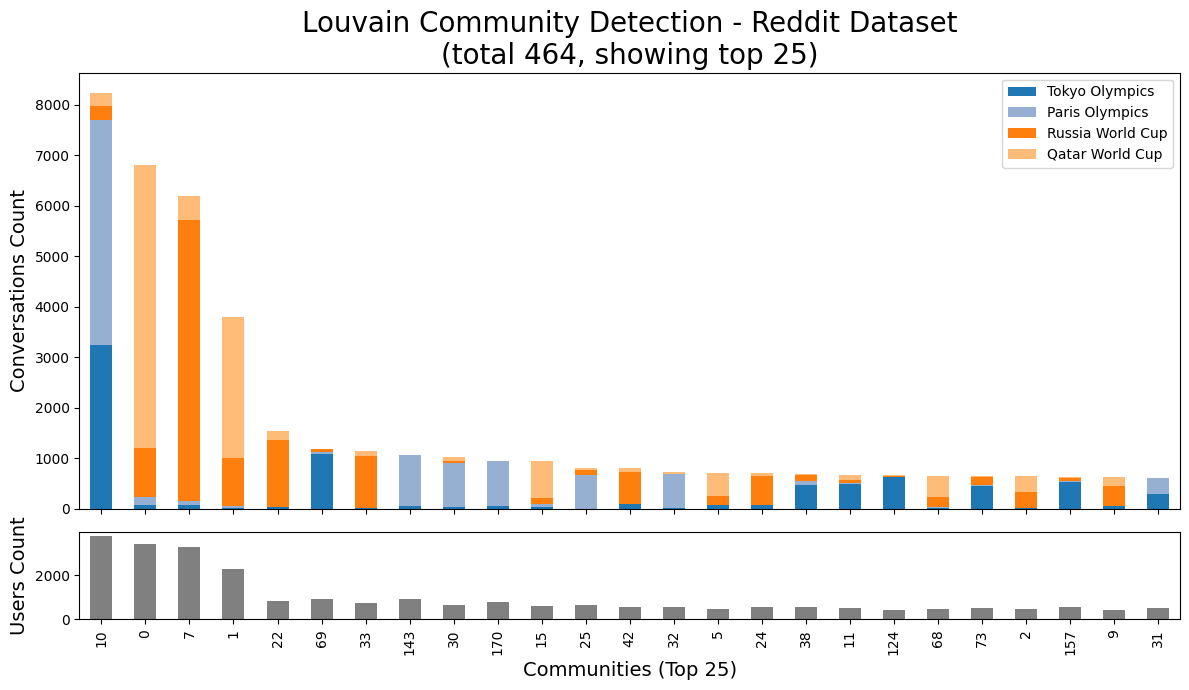

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

user_counts = df['users']
event_counts = df.drop(columns=['users', 'total'])

colors = {
    'Tokyo Olympics': '#1f77b4',
    'Paris Olympics': "#95b0d3",
    'Russia World Cup': '#ff7f0e',
    'Qatar World Cup': '#ffbb78'
}

fig, (ax2, ax1) = plt.subplots(2, 1, figsize=(12, 7), sharex=True, height_ratios=[5,1])

event_counts.plot(kind='bar', stacked=True, ax=ax2, color=[colors[col] for col in event_counts.columns])
ax2.set_ylabel('Conversations Count', fontsize=14)
ax2.set_title(f'Louvain Community Detection - Reddit Dataset\n(total {len(comms)}, showing top {limit})', fontsize=20)

user_counts.plot(kind='bar', ax=ax1, color='gray')
ax1.set_ylabel("Users Count", fontsize=14)
ax1.set_xlabel(f"Communities (Top {limit})", fontsize=14)

plt.tight_layout()
plt.show()
